## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and Viewing the Data

In [2]:
car_df=pd.read_csv('carmpg.csv')
car_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52,2130,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84,2295,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79,2625,18.6,82,1,"""ford ranger"""


## Statistical Information

In [3]:
car_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
car_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"""amc ambassador dpl"""


## Checking if the Dataset contains Nullvalues

In [5]:
car_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Basic Information

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


##### As you can see above the horsepower value are not integer values they are objects so need to check the values.

In [7]:
car_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

#### In the horsepower values ? mark is included which makes the variable as object. So, need to replace the values and convert horsepower variable to integer.

In [8]:
car_df['horsepower']=car_df['horsepower'].replace('?',np.nan)

#### Here the ? mark vales are replaced with the nan values so will check how many records got replaced

In [9]:
car_df['horsepower'].isnull().sum()

6

### Now need to convert the horsepower variable to interger and fill the nan values with median value of horsepower

In [10]:
car_df['horsepower']=car_df['horsepower'].astype('float64')

In [11]:
car_df['horsepower'].dtype

dtype('float64')

In [12]:
# fill the nan values with median values
car_df['horsepower']=car_df['horsepower'].fillna(car_df['horsepower'].median())

In [13]:
car_df['horsepower'].isnull().sum()

0

### so now the hp variable got converted to integers and now we can proceed to check the correlation of the variables

In [14]:
corr_table=car_df.corr()
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


## Visualization

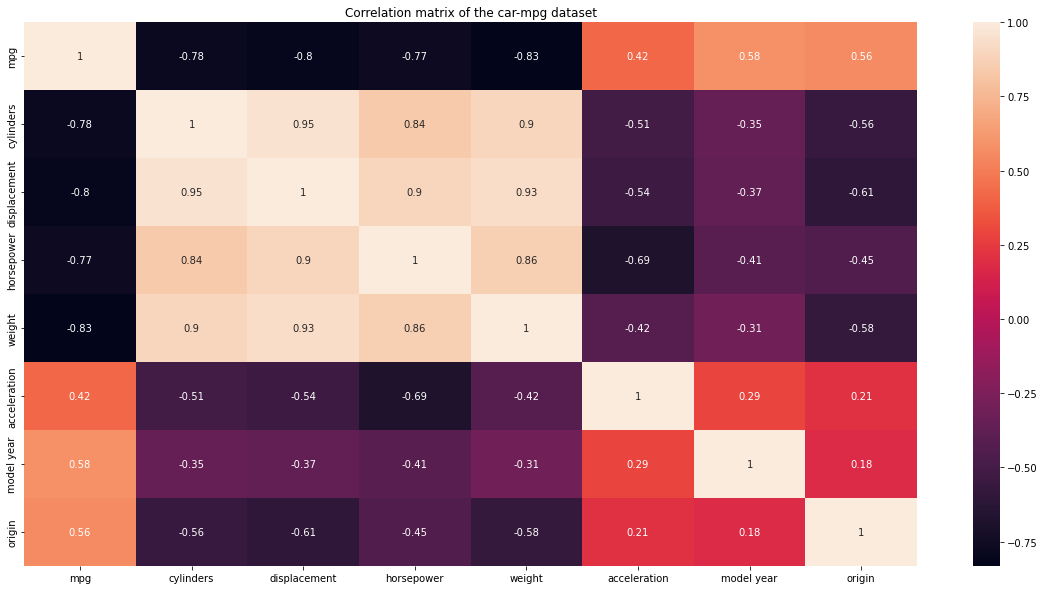

In [15]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corr_table,annot=True)
g.set(title='Correlation matrix of the car-mpg dataset')
plt.show()  

Inferences:
    
* Mpg column is having good corelation on cyl,disp,wt
* cyl ,disp and wt and hp are having negative corelation

## Next will check the data distribution using the pair plot

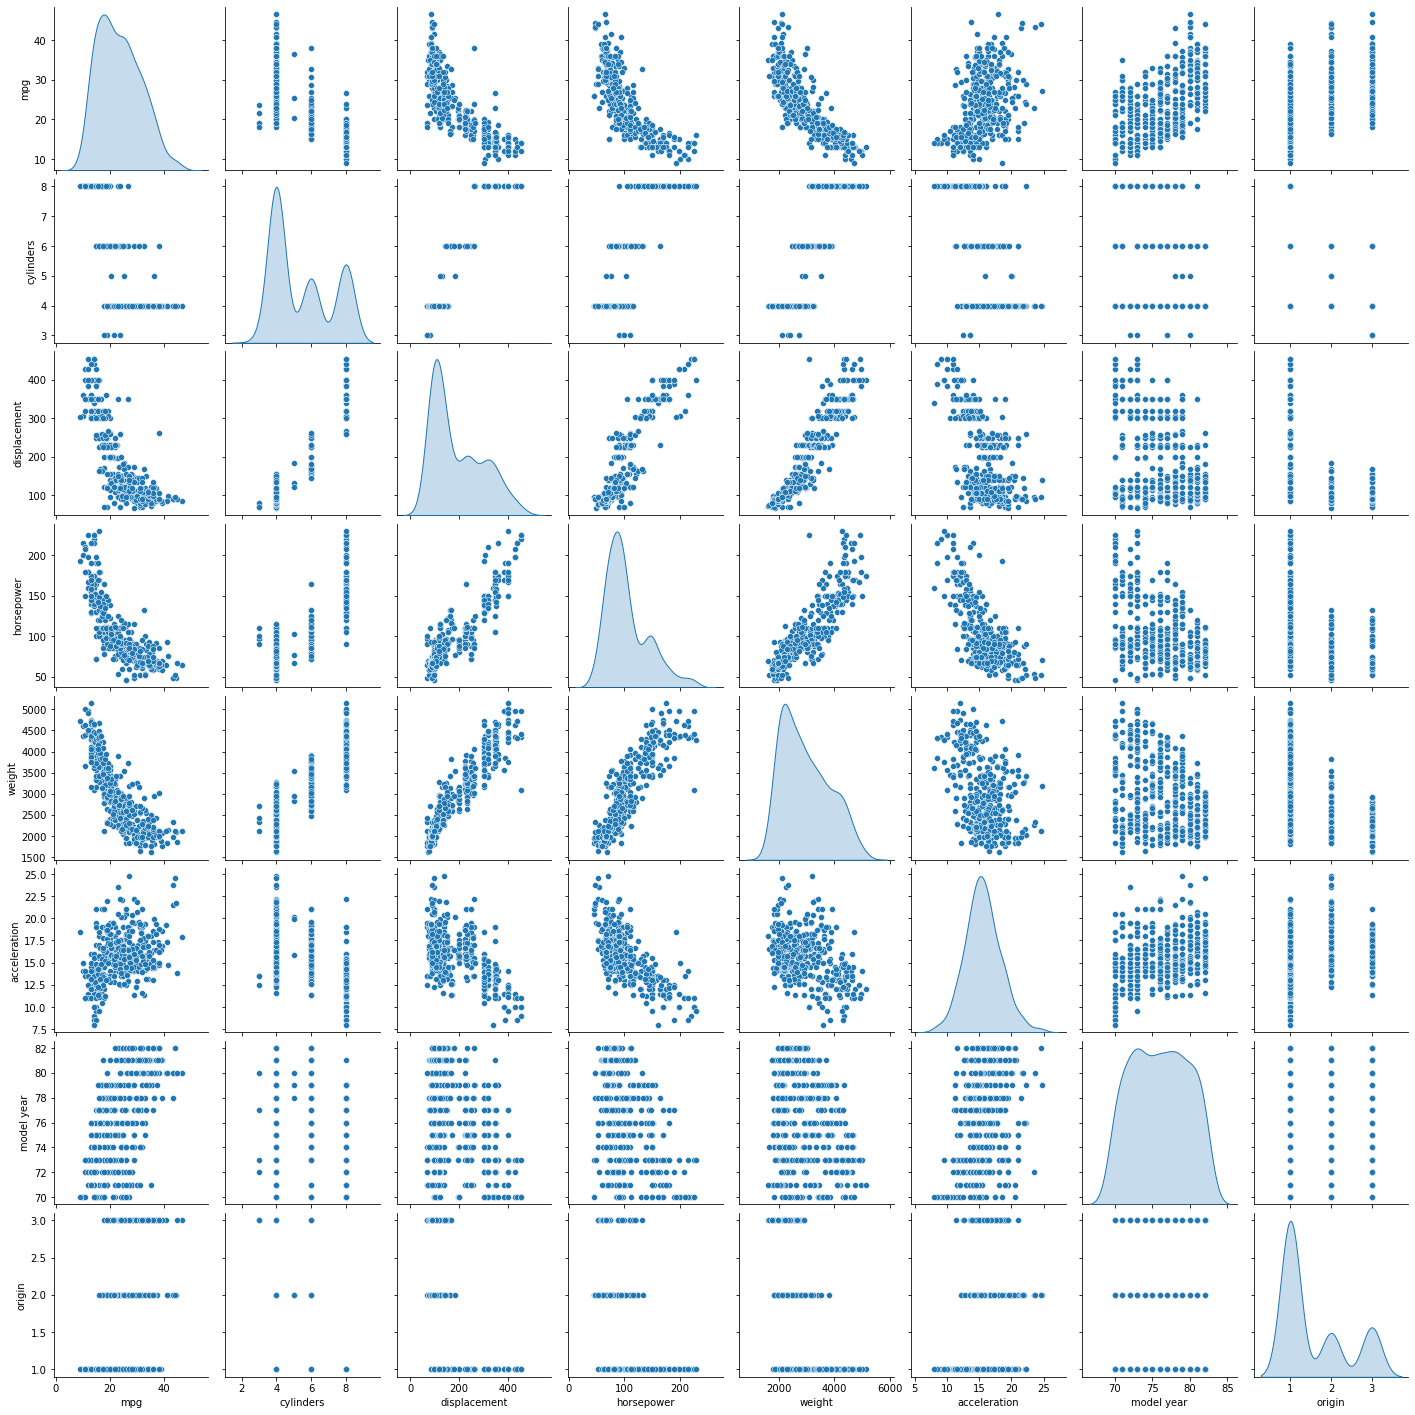

In [16]:
sns.pairplot(car_df,diag_kind='kde')
plt.show()

In [17]:
car_df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

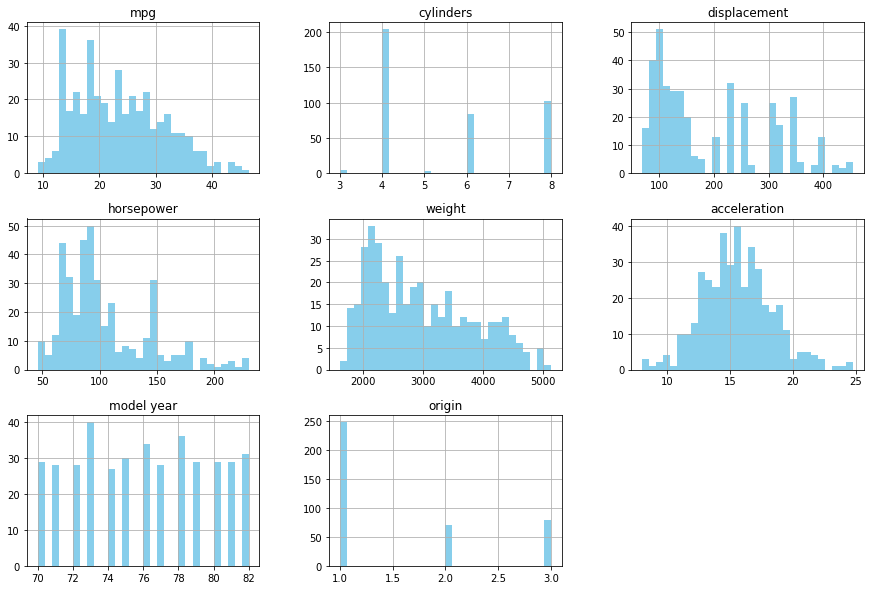

In [18]:
car_df.hist(bins=30, figsize=(15,10), color="skyblue")
plt.show()

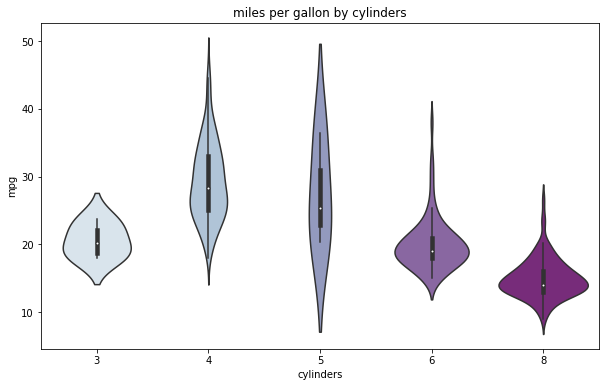

In [19]:
# miles per gallon by cylinders
plt.figure(figsize = (10,6))
plt.title('miles per gallon by cylinders')
sns.violinplot(data=car_df, x='cylinders',y='mpg',palette='BuPu')
plt.show()

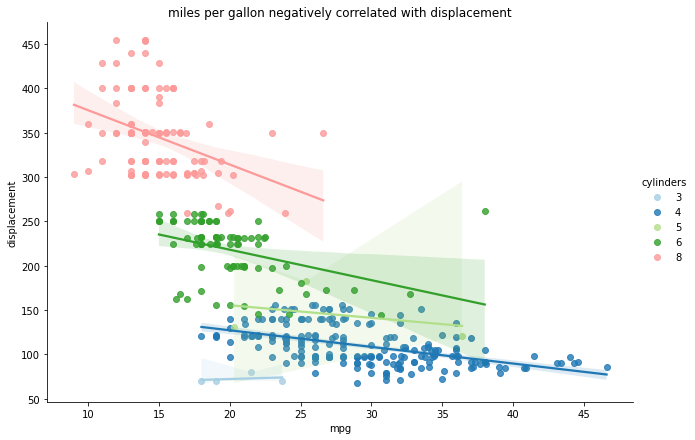

In [20]:
# miles per gallon negatively correlated with displacement
sns.lmplot(data = car_df, x ='mpg', y='displacement',hue='cylinders',palette = 'Paired',height = 6, aspect =1.5)
plt.title('miles per gallon negatively correlated with displacement')
plt.show()

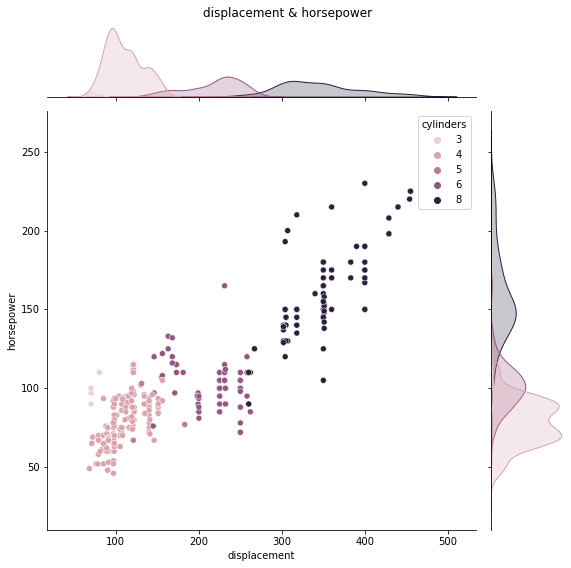

In [21]:
#displacement & horsepower
p = sns.jointplot(data=car_df, x='displacement', y ='horsepower', hue='cylinders' ,height = 8,marginal_kws=dict( fill=True))
p.fig.suptitle("displacement & horsepower")
p.fig.subplots_adjust(top=0.95)
plt.show()

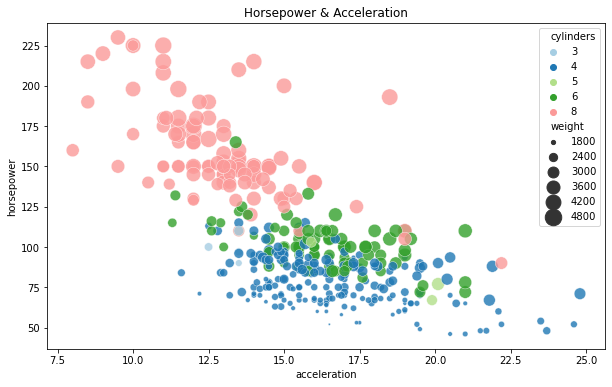

In [22]:
# horsepower, weight, acceleration
# horsepower negatively correlated with acceleration, positively correlated with weight
plt.figure(figsize = (10,6))
sns.scatterplot(data=car_df, x= 'acceleration',y='horsepower',size = 'weight',
                hue = 'cylinders',palette = 'Paired',
                sizes=(2,300),alpha = 0.8).set(title = 'Horsepower & Acceleration')
plt.show()

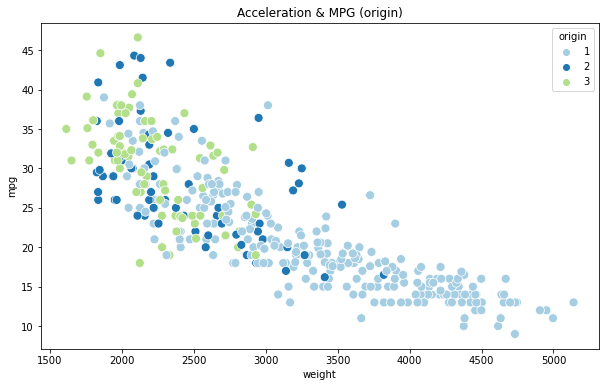

In [23]:
# acceleration & mpg (origin)
# negative correlation between mpg & weight
# origin impact on cars weight & mpg
plt.figure(figsize = (10,6))
sns.scatterplot(data=car_df, x= 'weight',y='mpg',hue = 'origin',
                palette = 'Paired',s=80).set(title = 'Acceleration & MPG (origin)')
plt.show()

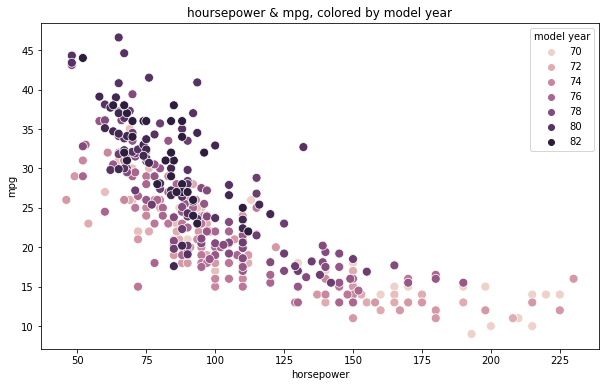

In [24]:
#hoursepower & mpg, colored by model year
#more recent years, lower horsepower & higher mpg
plt.figure(figsize = (10,6))
sns.scatterplot(data=car_df, x= 'horsepower',y='mpg',hue = 'model year',
                s=80).set(title = 'hoursepower & mpg, colored by model year')
plt.show()

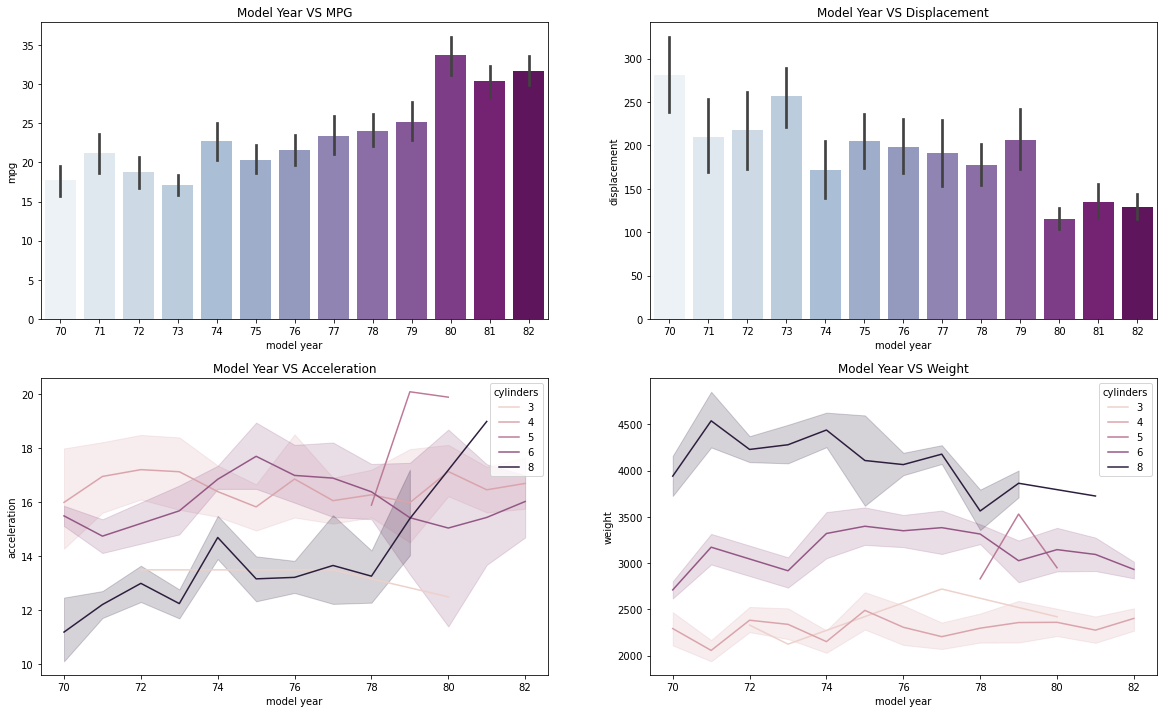

In [25]:
# model year influence
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(data=car_df, x='model year',y='mpg',palette = 'BuPu').set(title = 'Model Year VS MPG')
plt.subplot(2,2,2)
sns.barplot(data=car_df, x='model year',y='displacement',palette = 'BuPu').set(title = 'Model Year VS Displacement')
plt.subplot(2,2,3)
sns.lineplot(data=car_df, x='model year',y='acceleration',hue='cylinders').set(title = 'Model Year VS Acceleration')
plt.subplot(2,2,4)
sns.lineplot(data=car_df, x='model year',y='weight',hue='cylinders' ).set(title = 'Model Year VS Weight')
plt.show()